# NYC Hourly Weather Data in 2022

Click [here](https://www.ncei.noaa.gov/access/search/data-search/local-climatological-data?bbox=40.832,-74.192,40.611,-73.811&pageNum=1&dataTypes=DailyWeather&dataTypes=HourlyAltimeterSetting&dataTypes=HourlyDewPointTemperature&dataTypes=HourlyDryBulbTemperature&dataTypes=HourlyPrecipitation&dataTypes=HourlyPresentWeatherType&dataTypes=HourlyPressureChange&dataTypes=HourlyPressureTendency&dataTypes=HourlyRelativeHumidity&dataTypes=HourlySeaLevelPressure&dataTypes=HourlySkyConditions&dataTypes=HourlyStationPressure&dataTypes=HourlyVisibility&dataTypes=HourlyWetBulbTemperature&dataTypes=HourlyWindDirection&dataTypes=HourlyWindGustSpeed&dataTypes=HourlyWindSpeed&dataTypes=Sunrise&dataTypes=Sunset&startDate=2022-01-01T00:00:00&endDate=2022-12-31T23:59:59) to see the data source.

Below are the summary of the data.

## Stations

- 72505394728: Central Park
- 72503014732: LaGuardia Airport
- 72502014734: JFK Airport

## Report Types

### FM-15

- Type: METAR is an international standard for reporting current weather observations.
- Frequency: Typically issued every hour.
- Purpose: Provides a regular update on current weather conditions. Used primarily by pilots for flight planning and during flights, as well as by meteorologists for current weather analysis.
- Content: Contains information about temperature, dew point, wind speed and direction, visibility, cloud cover, atmospheric pressure, and other significant weather phenomena.

### FM-16

- Type: SPECI is a special weather report.
- Frequency: Not scheduled like METAR. Issued any time there is a significant change in weather conditions that falls outside the routine hourly METAR report but needs to be communicated immediately.
- Purpose: To alert relevant parties (e.g., pilots, air traffic controllers, meteorologists) of significant and potentially hazardous changes in weather conditions.
- Content: Similar to METAR in terms of the kind of data it presents, but SPECI is triggered by specific criteria or significant weather changes, such as rapid drops in visibility, thunderstorms, or wind shear events.

### FM-12

- Type: SYNOP reports are used to convey a range of meteorological observations.
- Frequency: Typically issued every six hours, aligning with the main synoptic hours, which are 0000, 0600, 1200, and 1800 UTC.
- Purpose: Used for surface-based observations and plays a vital role in the creation of weather maps and in the analysis of weather systems on a broader, or "synoptic", scale.
- Content: SYNOP reports include information on temperature, dew point, wind speed and direction, atmospheric pressure, cloud type and cover, present and past weather, and other meteorological phenomena. They can also contain data about sea wave height, sea temperature, and more if the station is located near the coast.
- Distribution: Historically, SYNOP reports were (and in many places, still are) transmitted via telecommunication systems using coded numerical formats to streamline and standardize the information. This coded format allows for efficient transmission and understanding across different regions and languages.- Type: SYNOP is an international standard for reporting current weather observations.

### SOD (Summary of Day)

- Type: SOD is a comprehensive summary report that provides a detailed overview of the day's weather conditions at a particular location.
- Frequency: Issued once daily, typically at the end of the day.
- Purpose: To provide a concise record of the day's weather, capturing maximum and minimum temperatures, total precipitation, significant weather events, and other relevant data.
- Content: A SOD report may include data points like the highest and lowest temperatures of the day, total rainfall or snowfall, peak wind speeds and directions, and other notable weather occurrences.
- Distribution: Useful for local weather analysis, historical weather data archiving, and for providing the public and professionals with a day's weather summary.

### SOM (Summary of Month)

- Type: SOM provides a comprehensive overview of the weather conditions for an entire month at a specific location.
- Frequency: Issued once per month, typically at the end or the beginning of the next month.
- Purpose: To offer a consolidated record of the month's weather, aiding in monthly comparisons, climatology studies, and long-term weather pattern analyses.
- Content: An SOM report compiles daily weather data for the entire month. This might include average, maximum, and minimum temperatures; total monthly precipitation; days with significant weather events (e.g., thunderstorms, fog, snow); and other relevant monthly statistics.
- Distribution: Valuable for climatologists, researchers, and meteorologists studying weather patterns, anomalies, and trends over longer periods.

## Weather Codes

| Code | Description |
| --- | --- |
| RA | Rain |
| FZRA | Freezing Rain |
| BR | Mist |
| SN | Snow |
| BLSN | Blowing Snow |
| FG | Fog |
| FZFG | Freezing Fog |
| HZ | Haze |
| TS | Thunderstorm |
| PL | Ice Pellets |
| GR | Hail |
| DZ | Drizzle |
| FZDZ | Freezing Drizzle |


In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('hourly-weather-nyc-2022.csv')
nyc_weather = df.copy()

df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,DailyWeather,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,...,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,Sunrise,Sunset
0,72505394728,2022-01-01T00:51:00,FM-15,7,NaN,29.93,47.0,51.0,0.00,NaN,...,29.90,OVC:08 14,29.76,9.00,49.0,000,NaN,0.0,NaN,NaN
1,72505394728,2022-01-01T01:51:00,FM-15,7,NaN,29.93,48.0,51.0,0.00,NaN,...,29.91,OVC:08 11,29.76,7.00,49.0,000,NaN,0.0,NaN,NaN
2,72505394728,2022-01-01T02:30:00,FM-16,7,NaN,29.92,47.0,51.0,NaN,NaN,...,NaN,BKN:07 16 BKN:07 20 OVC:08 27,29.75,8.00,49.0,000,NaN,0.0,NaN,NaN
3,72505394728,2022-01-01T02:38:00,FM-16,7,NaN,29.93,47.0,52.0,NaN,NaN,...,NaN,BKN:07 14 OVC:08 20,29.76,9.00,49.0,160,NaN,3.0,NaN,NaN
4,72505394728,2022-01-01T02:51:00,FM-15,7,NaN,29.92,47.0,51.0,0.00,NaN,...,29.89,BKN:07 15 OVC:08 24,29.75,9.00,49.0,140,NaN,5.0,NaN,NaN


In [73]:
# Preprocess data to make it easier to work with
datetimes = pd.to_datetime(nyc_weather['DATE'], format='%Y-%m-%dT%H:%M:%S')
nyc_weather['DATETIME'] = datetimes


# If precipitation is 'T' (trace), convert to 0.00
nyc_weather['HourlyPrecipitation'] = nyc_weather['HourlyPrecipitation'].replace('T', '0.00')
nyc_weather['HourlyPrecipitation'] = pd.to_numeric(nyc_weather['HourlyPrecipitation'], errors='coerce')

EWR_AIRPORT = 72502014734
LGA_AIRPORT = 72503014732
CENTRAL_PARK = 72505394728

# change the code to meaningful strings
nyc_weather['STATION'] = nyc_weather['STATION'].replace(EWR_AIRPORT, 'EWR')
nyc_weather['STATION'] = nyc_weather['STATION'].replace(LGA_AIRPORT, 'LGA')
nyc_weather['STATION'] = nyc_weather['STATION'].replace(CENTRAL_PARK, 'Central Park')

In [74]:
# count the number of rows by report type
nyc_weather['REPORT_TYPE'].value_counts()

REPORT_TYPE
FM-15    26273
FM-16     5412
FM-12     4338
SOD       1095
SOM         36
SY-MT        7
Name: count, dtype: int64

`DailyWeather` field uses METAR weather codes.
Reference: https://en.wikipedia.org/wiki/METAR#:~:text=METAR%20weather%20codes,-METAR%20abbreviations%20used&text=Codes%20before%20remarks%20will%20be,%22%20for%20%22light%20rain%22.

* Dry Bulb Temperature (DBT) is what commonly referred to as air temperature.
* Dew Point Temperature (DPT) is the temperature at which air becomes saturated with moisture.

In [75]:
weather_codes_dict = {
    'RA': 'Rain', 'FZRA': 'Freezing Rain',
    'BR': 'Mist',
    'SN': 'Snow', 'BLSN': 'Blowing Snow',
    'FG': 'Fog',
    'FZFG': 'Freezing Fog',
    'HZ': 'Haze',
    'TS': 'Thunderstorm',
    'PL': 'Ice Pellets', # small ice pellets with diameter < 5 mm
    'GR': 'Hail', # big ice pellets with diameter > 5 mm
    'DZ': 'Drizzle', 'FZDZ': 'Freezing Drizzle',
}

In [76]:
codes = set()
for weather_codes in nyc_weather['DailyWeather'].dropna().unique():
    for code in weather_codes.split():
        codes.add(code)

print(codes)

{'RA', 'PL', 'FZDZ', 'GR', 'SN', 'FG', 'HZ', 'DZ', 'BLSN', 'TS', 'UP', 'BR', 'FZRA', 'FZFG'}


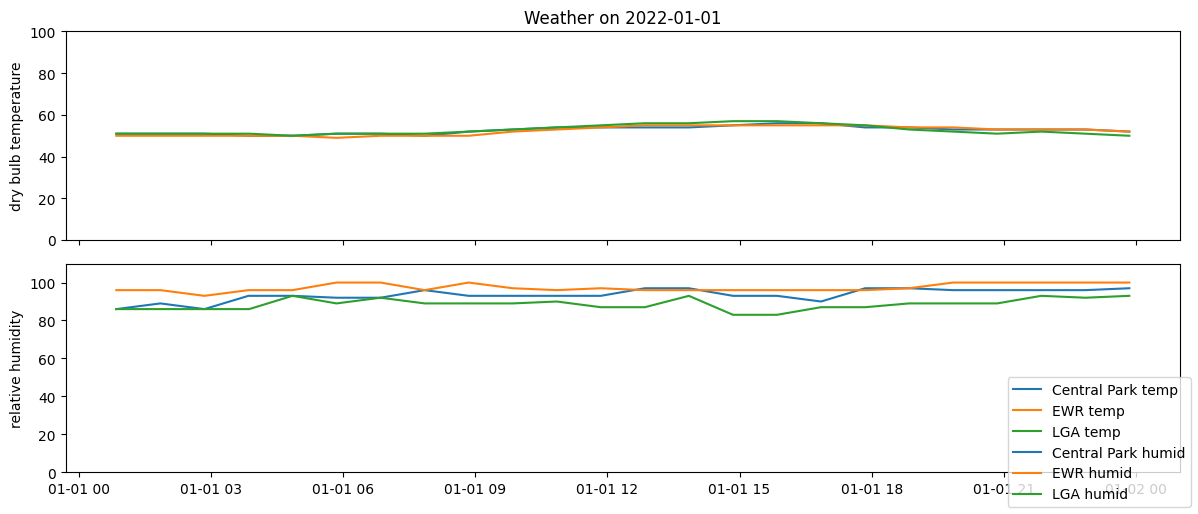

In [77]:
def plot_daily_weather(date, column='HourlyDryBulbTemperature'):
    """Plot the weather for a given date."""

    if isinstance(date, str):
        date = pd.to_datetime(date).date()

    weather = nyc_weather[(nyc_weather['DATETIME'].dt.date == date) & (nyc_weather['REPORT_TYPE'] == 'FM-15')]
    weather = weather.sort_values(by='DATETIME')

    fig, (temp_ax, humid_ax) = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

    for station, station_weather in weather.groupby('STATION'):
        temp_ax.plot(station_weather['DATETIME'], station_weather[column], label=station + ' temp')
        humid_ax.plot(station_weather['DATETIME'], station_weather['HourlyRelativeHumidity'], label=station + ' humid')

    temp_ax.set_ylabel('dry bulb temperature')
    temp_ax.set_ylim(0, 100)

    humid_ax.set_ylabel('relative humidity')
    humid_ax.set_ylim(0, 110)

    fig.legend(loc='lower right')
    fig.tight_layout()

    temp_ax.set_title(f'Weather on {date}')

plot_daily_weather('2022-01-01')

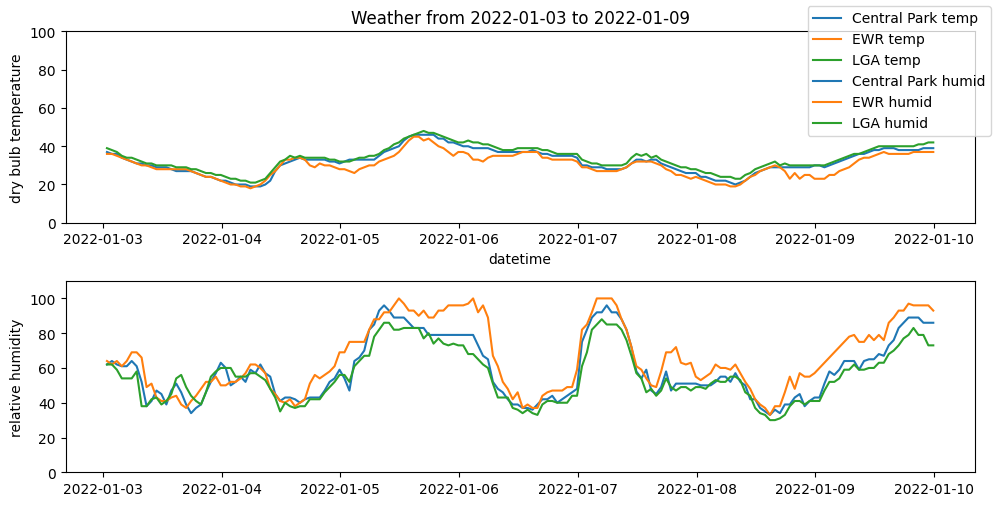

In [78]:
def plot_weekly_weather(date):
    if isinstance(date, str):
        date = pd.to_datetime(date).date()
    
    start_date = date - pd.Timedelta(days=date.weekday())
    end_date = start_date + pd.Timedelta(days=6)

    weather = nyc_weather[(nyc_weather['DATETIME'].dt.date >= start_date) & (nyc_weather['DATETIME'].dt.date <= end_date) & (nyc_weather['REPORT_TYPE'] == 'FM-15')]
    weather = weather.sort_values(by='DATETIME')

    fig, (temp_ax, humid_ax) = plt.subplots(2, 1, figsize=(10, 5))
    for station, station_weather in weather.groupby('STATION'):
        temp_ax.plot(station_weather['DATETIME'], station_weather['HourlyDryBulbTemperature'], label=station + ' temp')
        humid_ax.plot(station_weather['DATETIME'], station_weather['HourlyRelativeHumidity'], label=station + ' humid')

    temp_ax.set_xlabel('datetime')
    temp_ax.set_ylabel('dry bulb temperature')
    temp_ax.set_ylim(0, 100)

    humid_ax.set_ylabel('relative humidity')
    humid_ax.set_ylim(0, 110)

    fig.legend()
    fig.tight_layout()

    temp_ax.set_title(f'Weather from {start_date} to {end_date}')

plot_weekly_weather('2022-01-03')

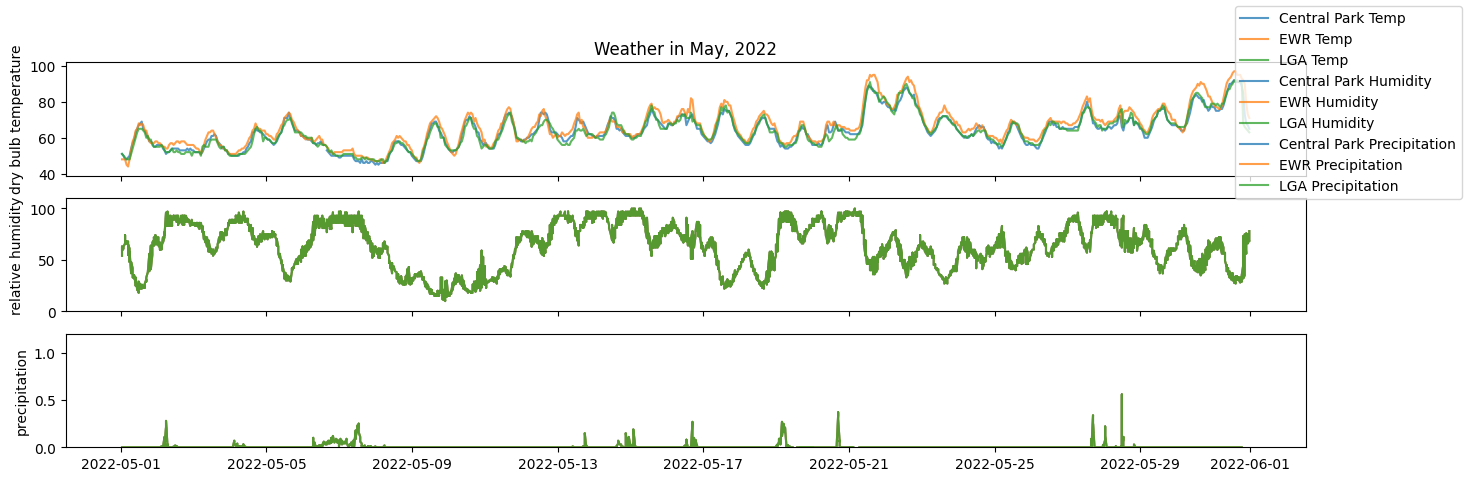

In [79]:
months = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
}

def plot_monthly_weather(month: int, stations=('EWR', 'LGA', 'Central Park')):
    weather = nyc_weather[(nyc_weather['DATETIME'].dt.month == month) & (nyc_weather['REPORT_TYPE'] == 'FM-15') & (nyc_weather['STATION'].isin(stations))]
    weather = weather.sort_values(by='DATETIME')

    fig, (temp_ax, humid_ax, prec_ax) = plt.subplots(3, 1, figsize=(16, 5), sharex=True)
    for station, data in weather.groupby('STATION'):
        temp_ax.plot(data['DATETIME'], data['HourlyDryBulbTemperature'], label=station + ' Temp', alpha=0.75)
        humid_ax.plot(weather['DATETIME'], weather['HourlyRelativeHumidity'], label=station + ' Humidity', alpha=0.75)
        prec_ax.plot(weather['DATETIME'], weather['HourlyPrecipitation'], label=station + ' Precipitation', alpha=0.75)

    
    min_temp = weather['HourlyDryBulbTemperature'].min()
    max_temp = weather['HourlyDryBulbTemperature'].max()
    temp_ax.set_ylim(min_temp - 5, max_temp + 5)
    temp_ax.set_ylabel('dry bulb temperature')

    humid_ax.set_ylabel('relative humidity')
    humid_ax.set_ylim(0, 110)

    prec_ax.set_ylabel('precipitation')
    prec_ax.set_ylim(0, 1.2)

    fig.legend()

    temp_ax.set_title(f'Weather in {months[month]}, 2022')

plot_monthly_weather(5)

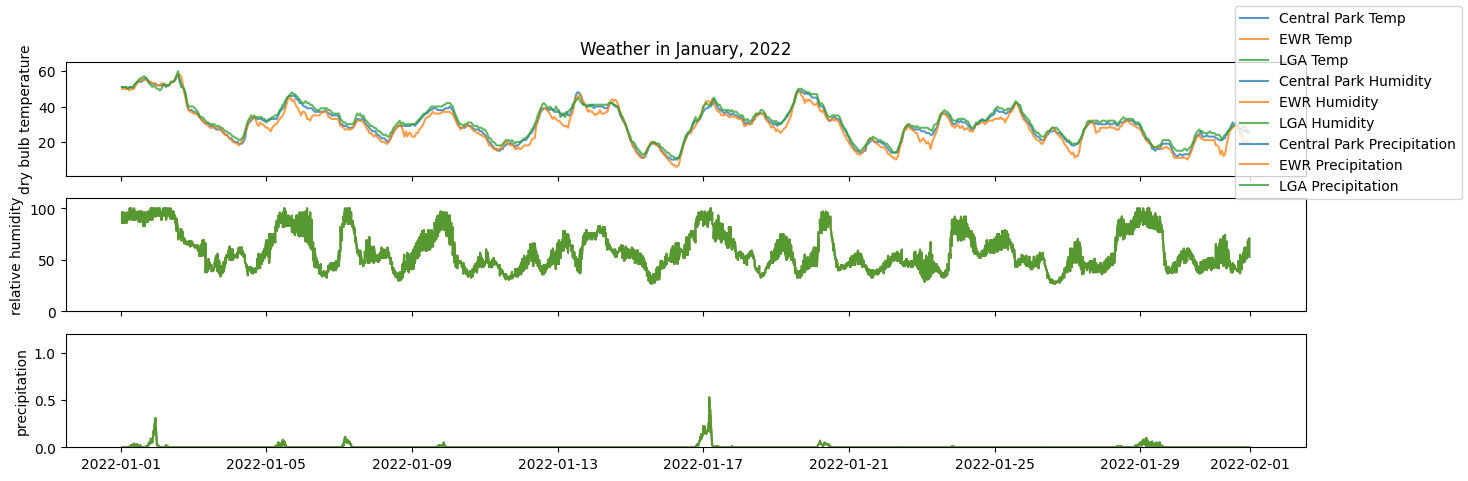

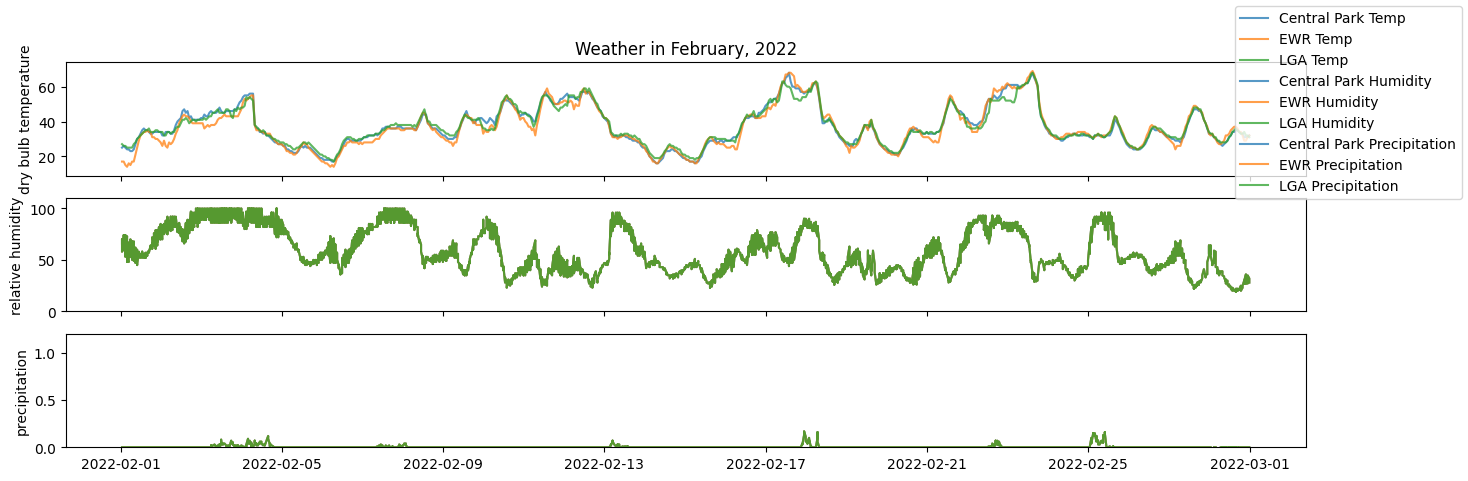

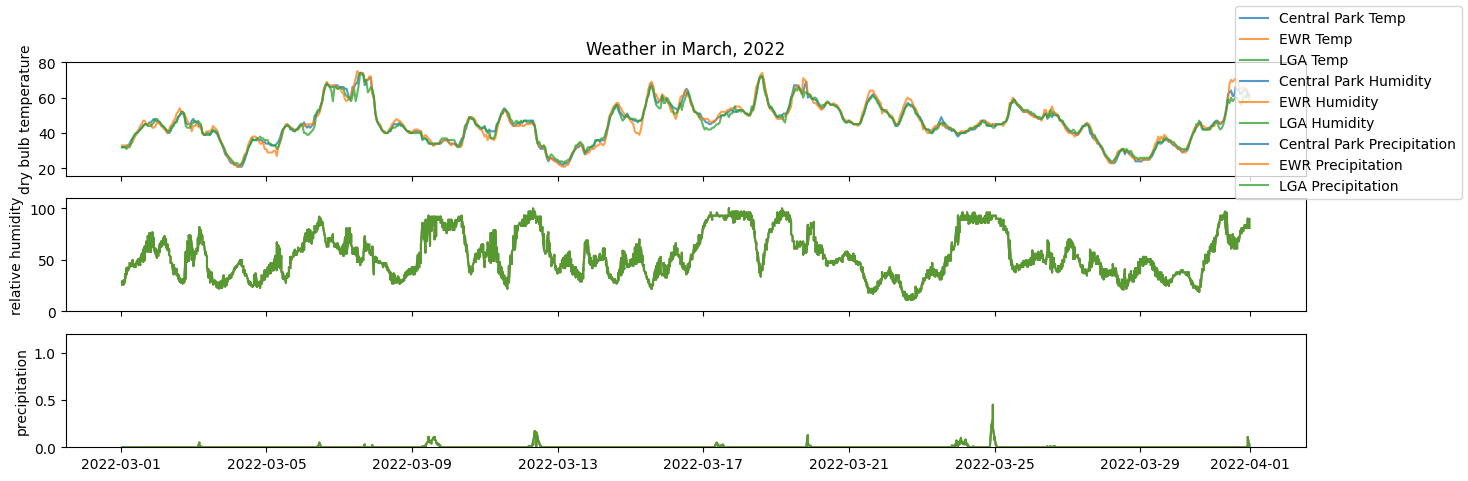

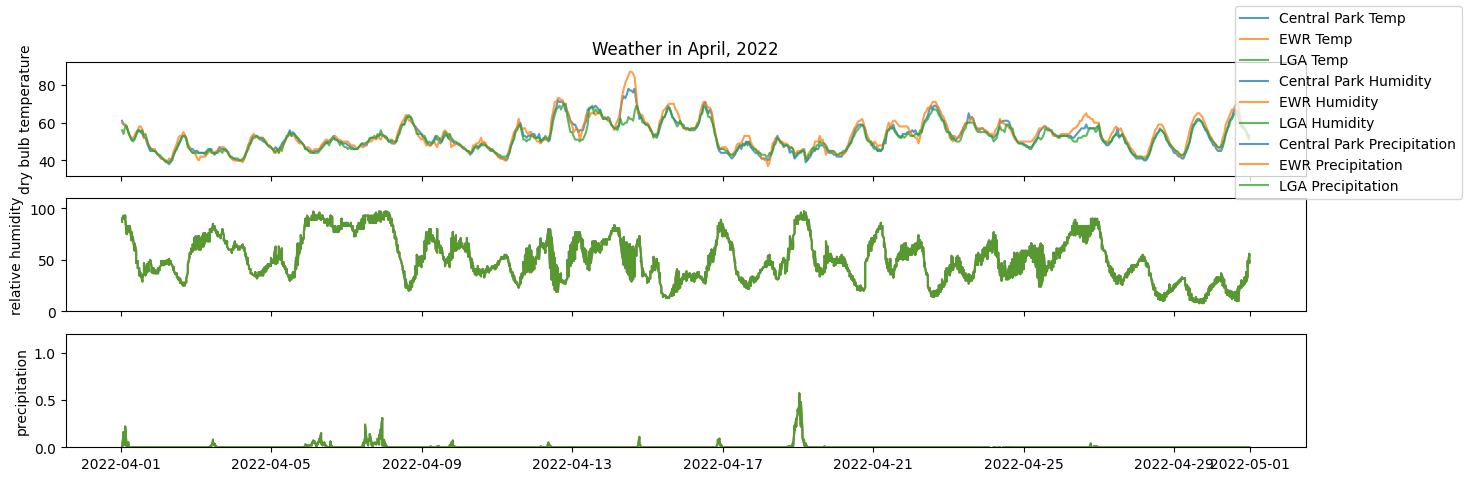

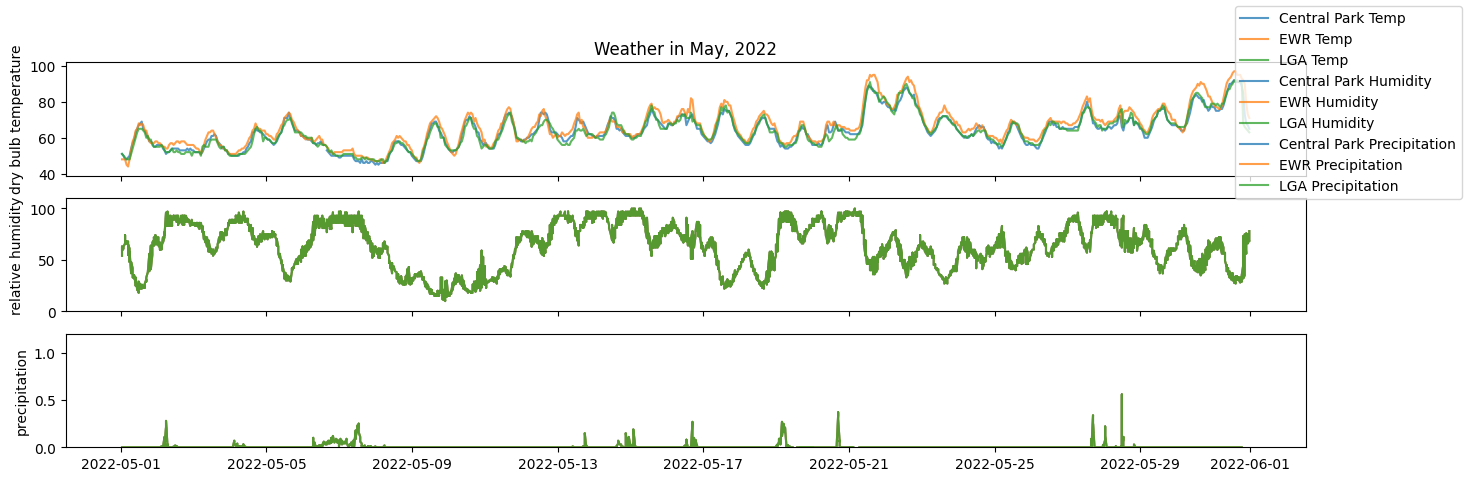

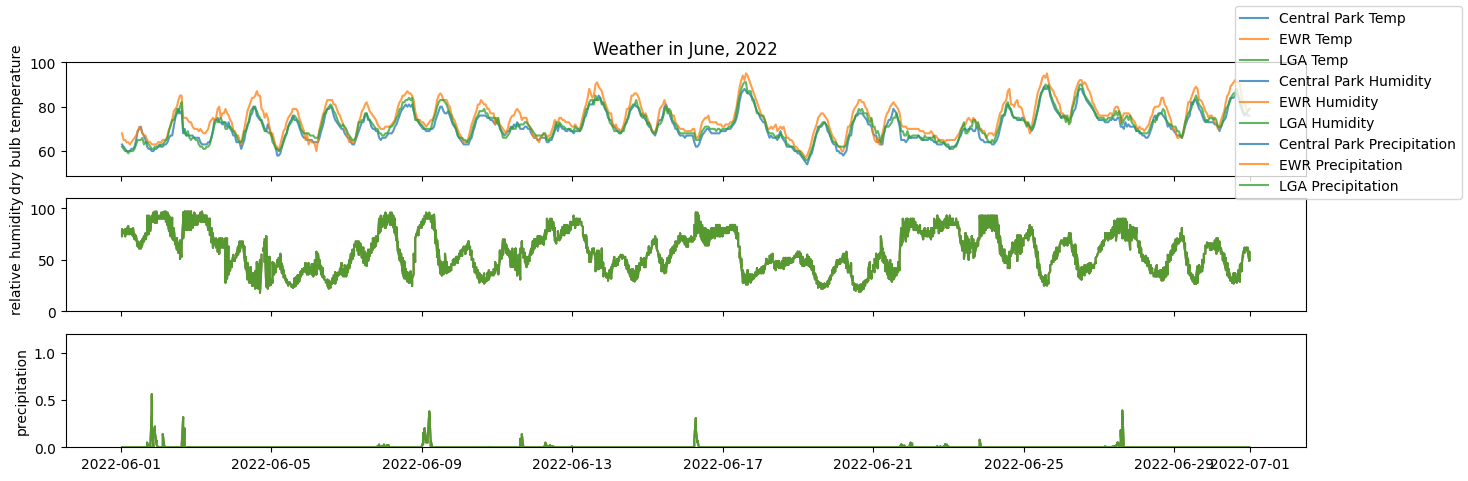

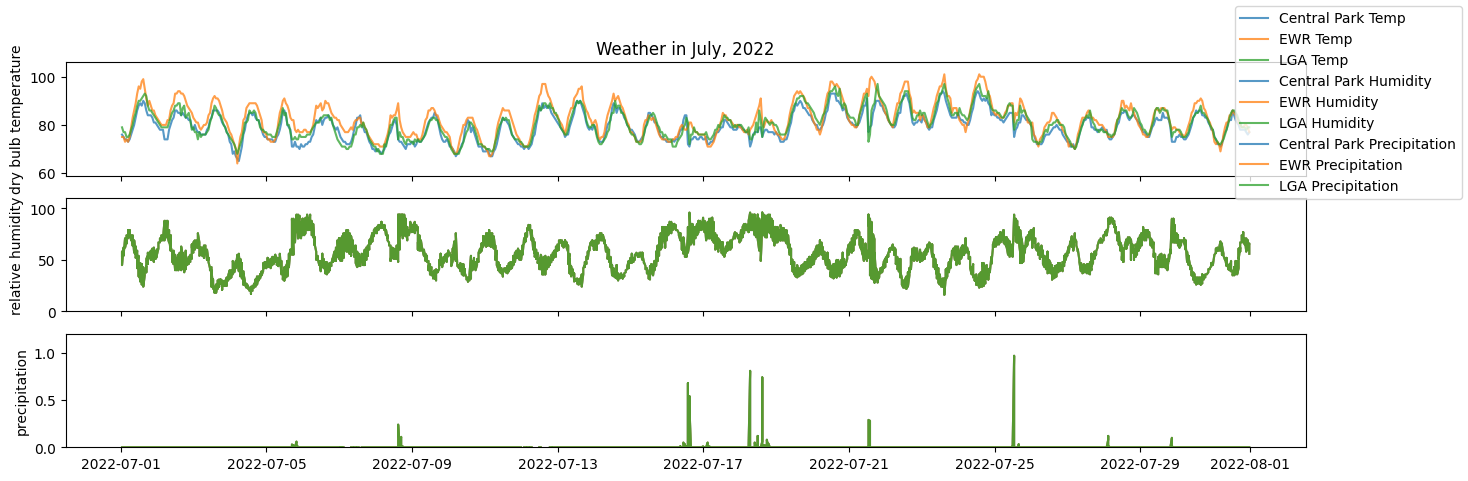

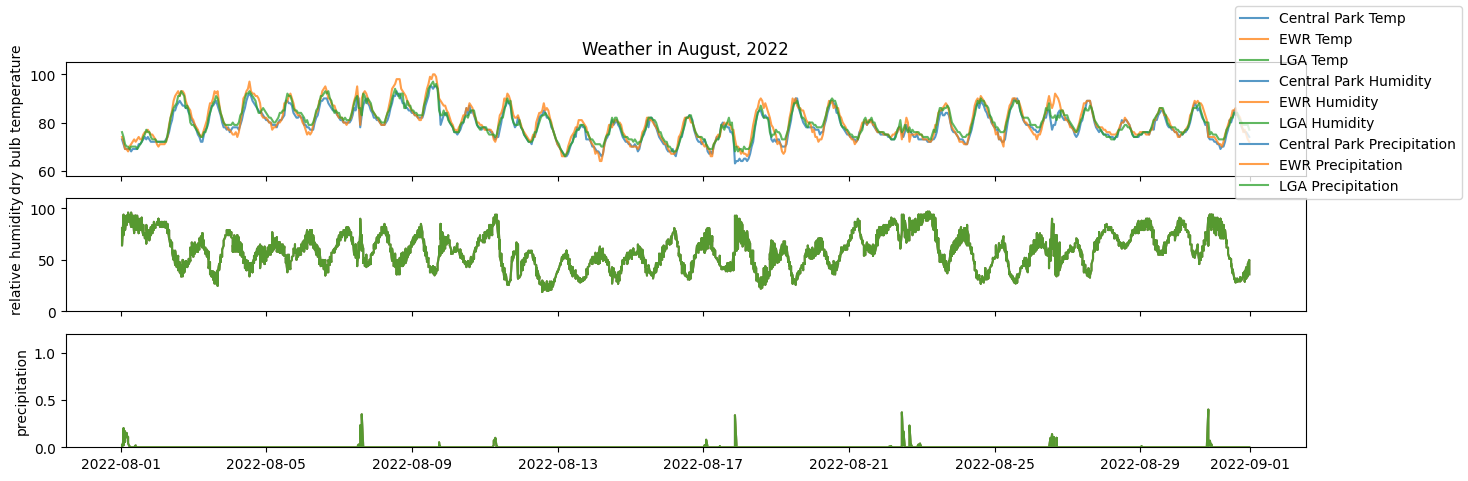

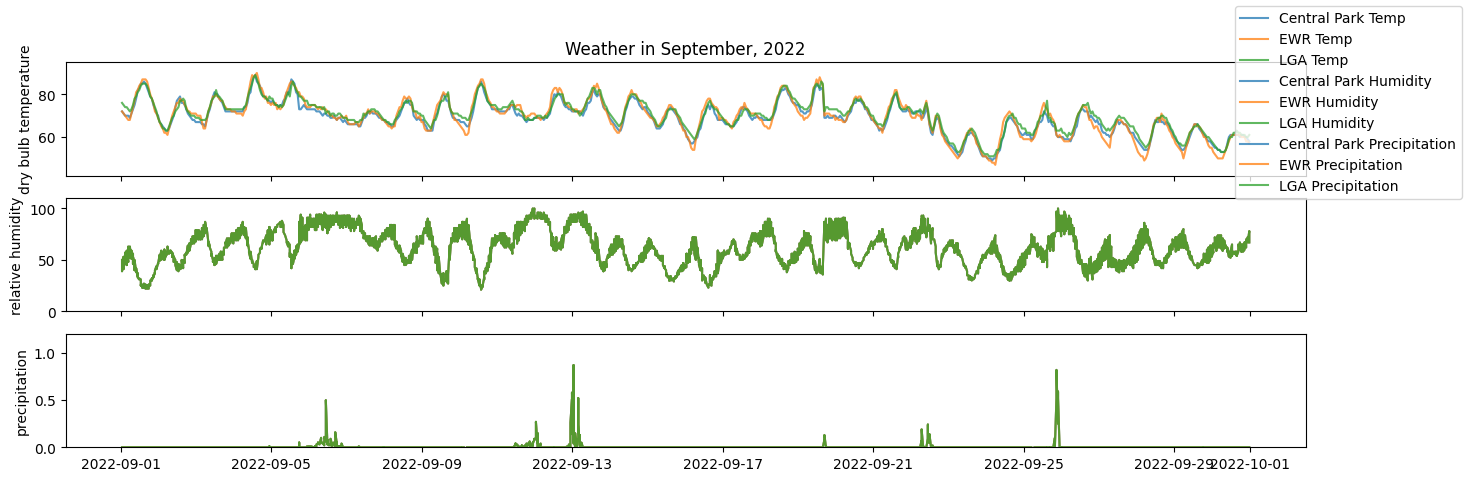

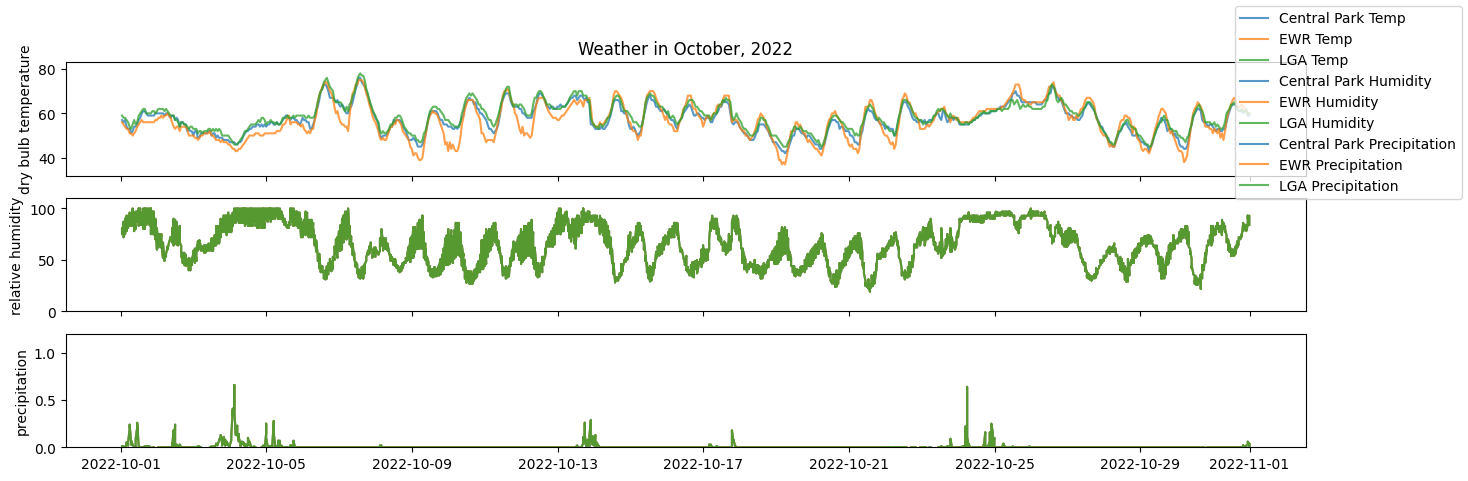

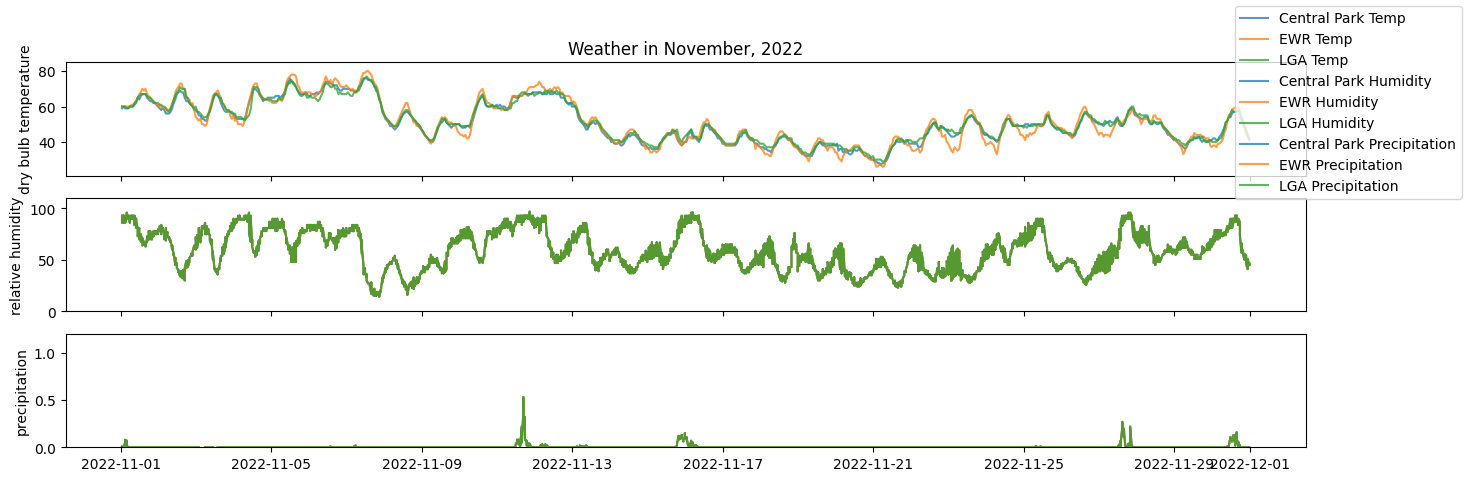

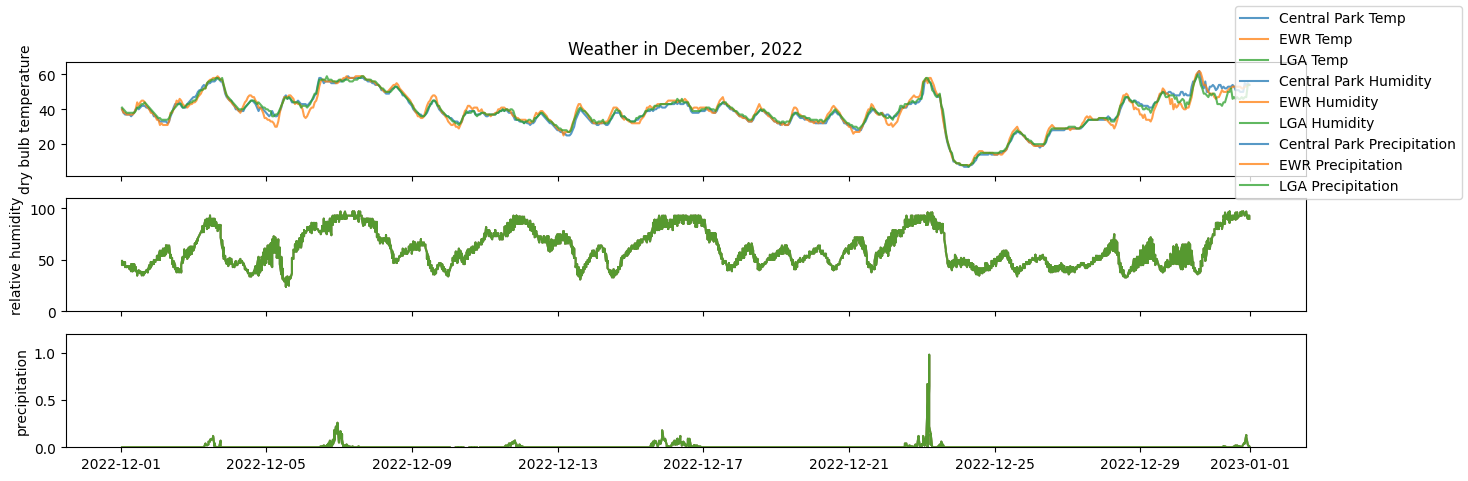

In [41]:
for month in range(1, 13):
    plot_monthly_weather(month)

In [80]:
weather_codes_dict

{'RA': 'Rain',
 'FZRA': 'Freezing Rain',
 'BR': 'Mist',
 'SN': 'Snow',
 'BLSN': 'Blowing Snow',
 'FG': 'Fog',
 'FZFG': 'Freezing Fog',
 'HZ': 'Haze',
 'TS': 'Thunderstorm',
 'PL': 'Ice Pellets',
 'GR': 'Hail',
 'DZ': 'Drizzle',
 'FZDZ': 'Freezing Drizzle'}

In [81]:
nyc_weather[['DATETIME', 'DailyWeather']].dropna()

,DATETIME,DailyWeather
58,2022-01-01 23:59:00,RA BR
106,2022-01-02 23:59:00,RA BR
205,2022-01-05 23:59:00,RA BR
275,2022-01-07 23:59:00,SN FZFG BR HZ FG
332,2022-01-09 23:59:00,RA BR
...,...,...
36551,2022-12-15 23:59:00,RA
36607,2022-12-16 23:59:00,RA BR
36821,2022-12-22 23:59:00,RA BR
36884,2022-12-23 23:59:00,TS RA SN PL BR HZ


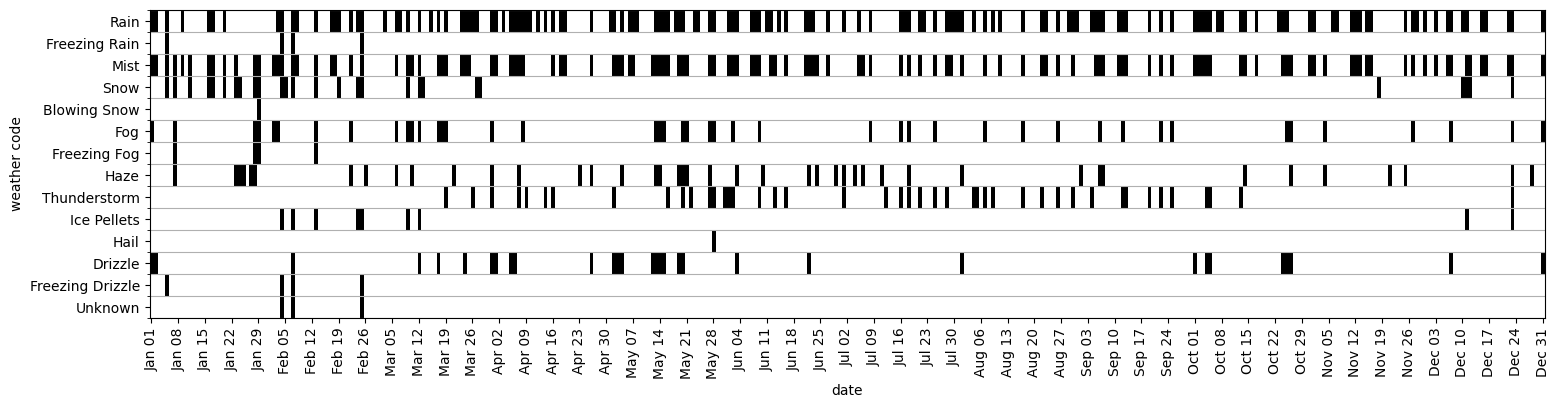

In [130]:
weather_codes_dict.setdefault('UP', 'Unknown')
dates = pd.date_range(start='2022-01-01', periods=365)
matrix = pd.DataFrame(0, index=weather_codes_dict.keys(), columns=dates)

weather_with_codes = nyc_weather[['DATETIME', 'DailyWeather']].dropna()

for _, row in weather_with_codes.iterrows():
    date = pd.Timestamp(row['DATETIME'].date())
    codes = row['DailyWeather'].split()
    matrix.loc[codes, date] = 1

plt.figure(figsize=(18, 4))
plt.imshow(matrix, aspect='auto', cmap='Greys')
plt.ylabel('weather code')
plt.grid(which='minor', axis='y', linestyle='-')
ax = plt.gca()
# ax.set_xticks(np.arange(-0.5, 365, 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(weather_codes_dict), 1), minor=True)
plt.xlabel('date')
plt.yticks(range(len(weather_codes_dict)), weather_codes_dict.values())
plt.xticks(range(0, 365, 7), dates[::7].strftime('%b %d'), rotation=90)
plt.show()
